In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("digit-recognizer/train.csv")


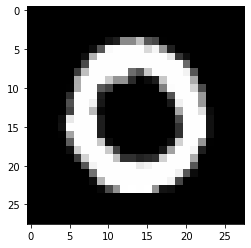

In [17]:
original_image = train_data.iloc[1]
image_1 = np.array(original_image.iloc[1:]).reshape(28,28)

plt.imshow(image_1,cmap='gist_gray')

Plot

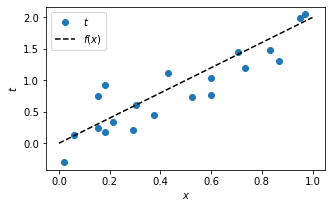

In [20]:
def f(x):
    return x*2
np.random.seed(42)
x = np.random.uniform(0, 1, 20)

# Create the targets t with some Gaussian noises
noise = np.random.normal(0, 0.3, size=x.shape[0])
t = f(x) + noise

# Plot the target t versus the input x
plt.figure(figsize=(5,3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'k--', label='$f(x)$')
plt.xlabel('$x$')
plt.ylabel('$t$')
plt.legend()
plt.show()

Find the Projection matrix B
and orthonormalize it

10.1 Problem setting

pssessess the data covariance matrix

$\begin{equation}
S = \frac{1}{N} \sum_{n=1}^{10} x_n x_n^T
\end{equation}$

And we assume there exists a low-dimensional compressed representation

$z_n = B^T x_n \in R^M$

In [1]:
import numpy as np 

A = np.array([[4,11,14],
        [8,7,-2]])
B = np.eye(3)

np.matmul(B,A.T)

array([[ 4.,  8.],
       [11.,  7.],
       [14., -2.]])

In [2]:
matrixA = np.array([[1,3],[3,2]])
u,s,vh = np.linalg.svd(matrixA,full_matrices="true")
print(u)
print(s)
print(vh)


[[-0.6463749  -0.76301998]
 [-0.76301998  0.6463749 ]]
[4.54138127 1.54138127]
[[-0.6463749  -0.76301998]
 [ 0.76301998 -0.6463749 ]]


In [4]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

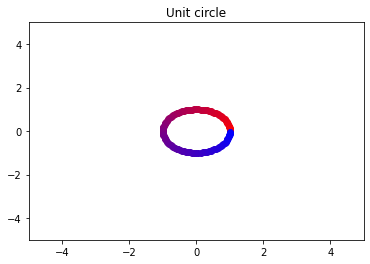

Rotating 2.356194490192345 or 135.0 degrees
[[-0.71 -0.71]
 [-0.71  0.71]]


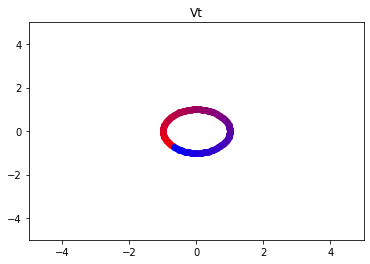

[[6.71 0.  ]
 [0.   2.24]]
Stretching x-axis by 6.70820393249937
Stretching y-axis by 2.2360679774997894


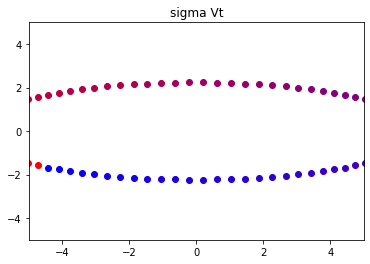

Rotating -1.892546881191539 or -108.43494882292202 degrees
[[-0.32 -0.95]
 [-0.95  0.32]]


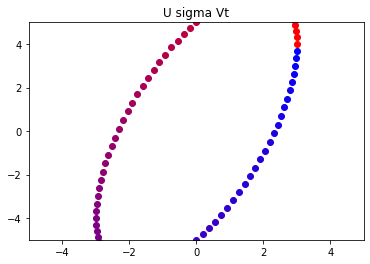

Original transformation
[[3 0]
 [4 5]]


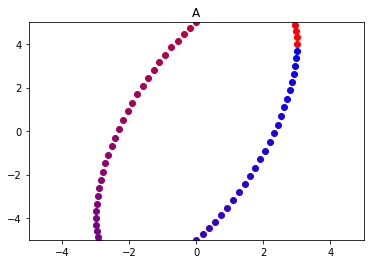

In [13]:
def plot(A, n=100):
    x = np.array([[np.cos(2*np.pi*i/n), np.sin(2*np.pi*i/n)] for i in range(n)])
    y = np.dot(A, x.T).T
    for i in range(n):
        plt.scatter(y[i,0], y[i,1], color=[(n-i)/n, 0, i/n])

def plot_circles(A, xlim=4, ylim=4, n=100):
    U,S,V = svd(A)
    sigma = np.diag(S)

    I = np.identity(len(A))
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plot(I,n)
    plt.title("Unit circle")
    plt.show()
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plot(V,n)
    print("Rotating", np.arccos(V[0][0]), 'or', np.arccos(V[0][0])*180/np.pi, "degrees")
    print(np.round(V,2))
    plt.title("Vt")
    plt.show()
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plot(np.dot(sigma,V),n)
    plt.title("sigma Vt")
    print(np.round(sigma,2))
    print("Stretching x-axis by", sigma[0][0])
    print("Stretching y-axis by", sigma[1][1])
    plt.show()
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plot(np.dot(np.dot(U,sigma),V),n)
    print("Rotating", -np.arccos(U[0][0]), 'or', -np.arccos(U[0][0])*180/np.pi, "degrees")
    plt.title("U sigma Vt")
    print(np.round(U,2))
    plt.show()
    plt.xlim(-xlim, xlim)
    plt.ylim(-ylim, ylim)
    plot(A,n)
    print("Original transformation")
    plt.title("A")
    print(np.round(A,2))
    
    return U, S, V

A = np.array([[3,0],
              [4,5]])

U,S,V = plot_circles(A, xlim=5, ylim=5, n=100)

In [1]:
import numpy as np
ma = np.array([12,3,56])
mb = np.array([1,3,6])
ma@mb.T

357

In [6]:
from numpy.linalg import eig
arr = np.array([[3,2,2],
                [2,3,-2]])
eig(arr.T@arr)

(array([2.50000000e+01, 4.69538746e-15, 9.00000000e+00]),
 array([[-7.07106781e-01, -6.66666667e-01,  2.35702260e-01],
        [-7.07106781e-01,  6.66666667e-01, -2.35702260e-01],
        [ 1.42731104e-17,  3.33333333e-01,  9.42809042e-01]]))